# **Handwritten Digit Recognition with CNN (MNIST)**

## **Import Libraries & Dataset**

In [82]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [83]:
# load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## **Exploratory Data Analysis**

In [84]:
# shape

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}\n')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)

y_train shape: (60000,)
y_test shape: (10000,)


In [85]:
# pixel value range

print(f'{X_train.min()}, {X_train.max()}')

0, 255


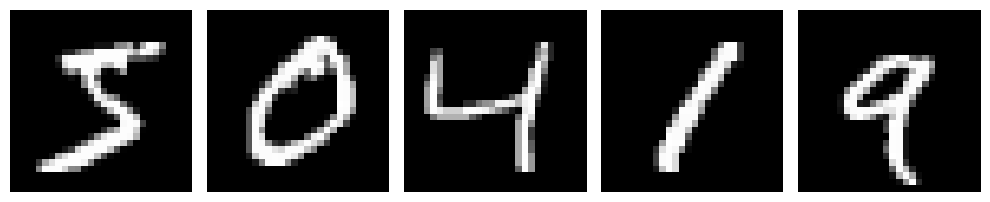

In [86]:
# first 5 images

plt.figure(figsize=(10, 5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()

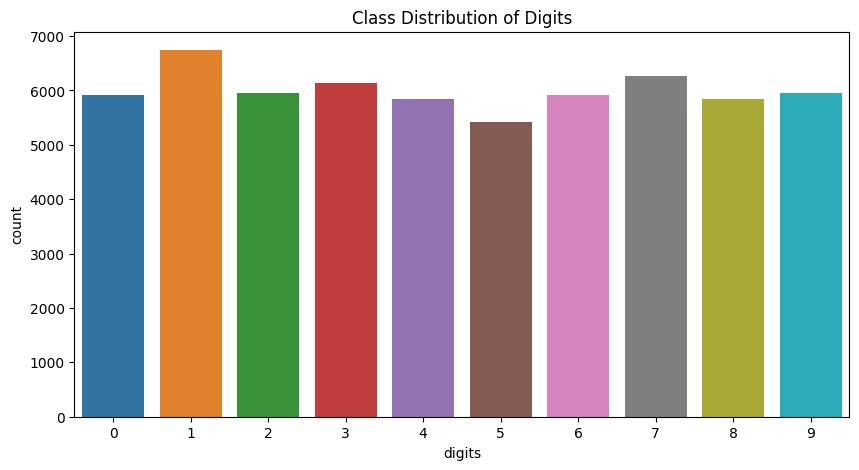

In [87]:
# class distribution

y_train = pd.Series(y_train.ravel())

plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, hue=y_train, palette='tab10', legend=False)
plt.title("Class Distribution of Digits")
plt.xlabel("digits")
plt.show()

## **Data Preprocessing**

In [88]:
# normalize pixel values

X_train = X_train / 255.0
X_test = X_test / 255.0

In [89]:
# flatten the input

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

## **Build the ANN model**

In [90]:
# ann model

model = Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [91]:
# compile

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
# train

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8690 - loss: 0.4557 - val_accuracy: 0.9605 - val_loss: 0.1295
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9619 - loss: 0.1290 - val_accuracy: 0.9725 - val_loss: 0.0935
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9748 - loss: 0.0836 - val_accuracy: 0.9732 - val_loss: 0.0913
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9821 - loss: 0.0609 - val_accuracy: 0.9748 - val_loss: 0.0826
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0422 - val_accuracy: 0.9775 - val_loss: 0.0730


In [94]:
# evaluation

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'loss: {test_loss}, \naccuracy: {test_acc}')

ValueError: Cannot take the length of shape with unknown rank.

In [97]:
# prediction

prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


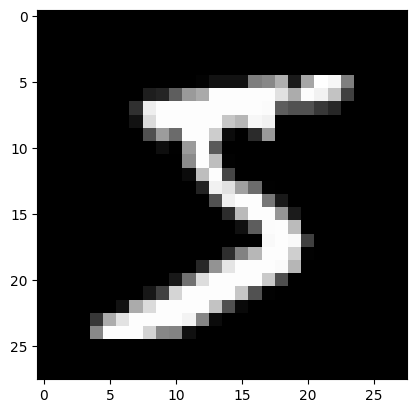

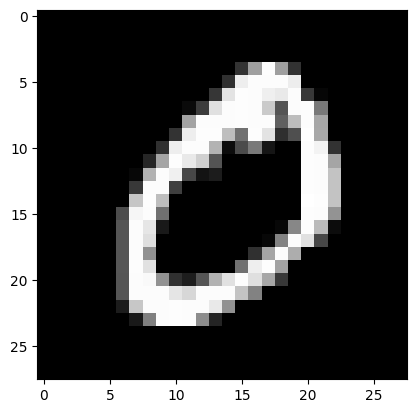

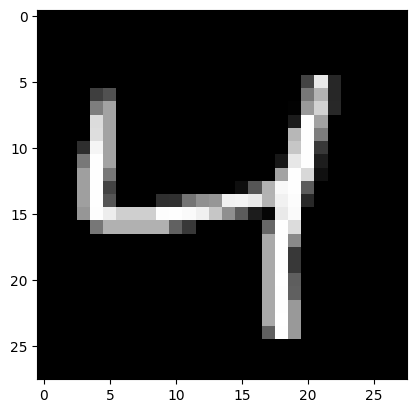

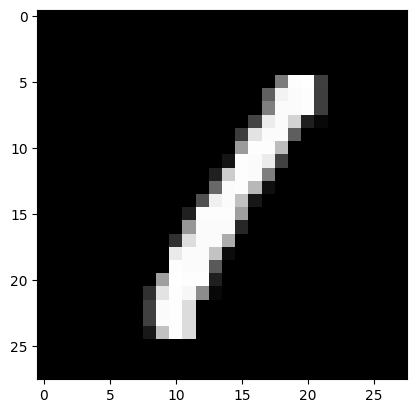

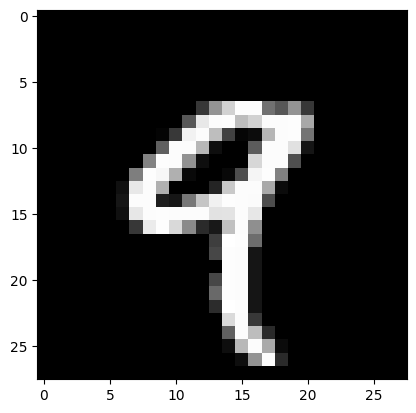

In [98]:
# visualize

for i in range(5):
  plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
  plt.show()